In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import utils
%matplotlib inline

In [7]:
file_name = "results/analysis-XLM-tweets-processed.csv"
file_test = "dataset/XLM-tweets-processed.csv"
save_to = "results/XLM-predicted.csv"

In [8]:
df_pred = pd.read_csv(file_name, 
                      names=["id",
                            "prediction",
                            "sentiment",
                            "text"],
                      skiprows=[0])

df_test = pd.read_csv(file_test, header=None)
df_pred['sentiment'] = np.where(df_pred['prediction'] == 0, 'negative', 'positive')
df_pred['text'] = df_test[1]

In [9]:
df_pred.head(40)

,id,prediction,sentiment,text
0,0,0,negative,b USER_MENTION nxc has potential to to now and...
1,1,1,positive,bportfolio today up biln boo sqz rfx sfr opm g...
2,2,0,negative,b USER_MENTION crypto trading stellar lumens x...
3,3,1,positive,b USER_MENTION facts multibillion max supply c...
4,4,1,positive,b USER_MENTION which coin below would you pref...
5,5,1,positive,b USER_MENTION buy it now to this exchange URL
6,6,1,positive,bUSER_MENTION i rode it from to or so last wee...
7,7,1,positive,b USER_MENTION URL
8,8,1,positive,b USER_MENTION which of the top coins listed o...
9,9,1,positive,bpayment infrastructure optimization is integr...


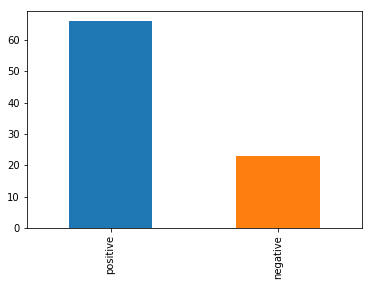

In [10]:
df_pred['sentiment'].value_counts().plot(kind='bar')

In [13]:
df_pred.to_csv(path_or_buf=save_to,
               sep=',',
               columns=['id', 'prediction', 'text'],
               header=None,
               index=False,
               encoding='utf-8')

In [14]:
FREQ_DIST_FILE = 'results/XLM-predicted-freqdist.pkl'
BI_FREQ_DIST_FILE = 'results/XLM-predicted-freqdist-bi.pkl'

In [15]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('b', 57),
 ('to', 42),
 ('is', 28),
 ('the', 26),
 ('for', 24),
 ('i', 20),
 ('a', 19),
 ('xlm', 17),
 ('and', 16),
 ('on', 16),
 ('now', 13),
 ('you', 13),
 ('in', 13),
 ('will', 13),
 ('it', 12),
 ('stellar', 12),
 ('trading', 11),
 ('this', 10),
 ('of', 10),
 ('an', 10)]

In [16]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('is', 'now'), 8),
 (('now', 'available'), 7),
 (('available', 'for'), 7),
 (('for', 'trading'), 7),
 (('stellar', 'is'), 7),
 (('will', 'be'), 6),
 (('b', 'stellar'), 6),
 (('trading', 'happy'), 6),
 (('happy', 'is'), 6),
 (('is', 'an'), 6),
 (('an', 'open'), 6),
 (('open', 'source'), 6),
 (('source', 'crossborder'), 6),
 (('i', 'will'), 5),
 (('to', 'the'), 5),
 (('to', 'one'), 5),
 (('xlm', 'is'), 4),
 (('b', 'if'), 4),
 (('for', 'a'), 4),
 (('stellar', 'lumens'), 3)]

In [17]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([-0.72669314,  4.31386845])